<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>



# **단변량 분석 ① - 수치형**

- 수치형 변수는 크기를 비교할 수 있는 연속적인 숫자를 갖는 변수입니다.
- 수치형 변수는 값의 분포와 평균, 최댓값, 최솟값, 중앙값 등을 확인해 분석합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/var_01.png' width=600 align='left'/>

## **1.환경준비**

- 사용할 라이브러리와 분석 대상 데이터를 불러옵니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Diabetes 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/diabetes2.csv'
diabetes = pd.read_csv(path)

# 확인
diabetes.head()

,Pregnancies,Glucose,BloodPressure,BPStatus,SkinThickness,Insulin,BMI,BMIStatus,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,Normal,35.0,NaN,33.6,Obese,0.627,50.0,1
1,1,85.0,66.0,Normal,29.0,NaN,26.6,Overweight,0.351,31.0,0
2,8,183.0,64.0,Normal,NaN,NaN,23.3,Normal,0.672,32.0,1
3,1,89.0,66.0,Normal,23.0,94.0,28.1,Overweight,0.167,21.0,0
4,0,137.0,40.0,Low,35.0,168.0,43.1,Obese,2.288,33.0,1


**📋 데이터 정보**

피마 인디언 당뇨 데이터셋은 몇 명의 여성 피마 인디언의 진료 자료와 진단 후 5년 내 당뇨 발병 여부로 구성됨

- Pregnancies: 임신 횟수
- Glucose: 포도당, 피속에 있는 혈당 수치(mg/dL)(정상: 공복 시 70~100)
- BloodPressure: 혈압(mm Hg)
- BPStatus: Low(저혈압), Normal(정상), High(고혈압)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml), 혈당 조절에 중요한 역할
- BMI: 체질량지수(체중(kg)/키(m)^2)
- BMIStatus: Underweight(저체중), Normal(정상), Overweight(과체중), Obese(비만)
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 당뇨병 여부(0 또는 1)

**diabetes**

- 당뇨병(糖尿病, diabetes)은 높은 혈당 수치가 오랜 기간 지속되는 대사 질환이다.
- 혈당이 높을 때의 증상으로는 소변이 잦아지고, 갈증과 배고픔이 심해진다.
- 이를 치료하지 않으면 다른 합병증을 유발할 수 있다.
(출처: 위키백과)

In [3]:
# AirQuality 데이터
air = pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/airquality2.csv')
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


**📋 데이터 정보**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Date: 측정 년월일

## **2. 수치화**

- 수치형 변수를 수치화해 분석할 때는 평균, 중앙값, 최빈값, 4분위수 등 대푯값을 사용합니다.
- Pandas의 **describe()** 메소드를 사용해 수치형 변수의 통계 정보를 쉽게 확인할 수 있습니다.

### **2.1. 대푯값**

- 우선 대푯값의 의미와 확인 방법을 살펴봅니다.

**1) 평균**

- 가장 대표적인 대푯값이 평균입니다.
- **mean()** 메소드로 평균을 구합니다.

In [4]:
diabetes['BMI'].mean()

np.float64(32.457463672391015)

**2) 중앙값(중위수, median)**

- 데이터를 크기 순으로 나열한 상태에서 가운데 위치한 값을 중앙값이라고 합니다.
- **median()** 메소드로 중앙값을 구합니다.

In [5]:
diabetes['BMI'].median()

32.3

**3) 최빈값**

- 데이터 중에서 가장 빈번하게 나타나는 값, 즉 빈도가 가장 높은 값을 최빈값이라고 합니다.
- 같은 빈도의 값이 여럿 존재할 수 있으므로 최빈값은 여러 개 존재 할 수 있습니다.
- **mode()** 메소드로 최빈값을 확인합니다.

In [6]:
diabetes['BMIStatus'].mode()

0    Obese
Name: BMIStatus, dtype: object

- 실제 최빈값은 다음과 같이 인덱스를 사용해 조회합니다.

In [7]:
diabetes['BMIStatus'].mode()[0]

'Obese'

**4) 4분위수**

- **describe()** 메소드로 4분위수를 확인할 수 있습니다.

<img src='https://raw.githubusercontent.com/jangrae/img/master/quartile2.png' width=700 align="left"/>

In [8]:
diabetes['BMI'].describe()

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

- 1사분위수(25%)를 Q1, 2사분위수(50%)를 Q2, 3사분위수(75%)를 Q3로 지칭합니다.
- 다음과 같이 Q1, Q2, Q3 값을 개별적으로 확인할 수 있습니다.

In [9]:
print('Q1:', diabetes['BMI'].describe()['25%'])
print('Q2:', diabetes['BMI'].describe()['50%'])
print('Q3:', diabetes['BMI'].describe()['75%'])

Q1: 27.5
Q2: 32.3
Q3: 36.6


- 참고로, 4사분위수(100%)를 Q4로 지칭합니다.
- 4사분위수는 최댓값이므로 다음과 같이 Q4 값을 확인할 수 있습니다.

In [10]:
print('Q4:', diabetes['BMI'].describe()['max'])

Q4: 67.1


### **2.2. 기술통계 정보**

- 기술통계 정보를 사용해 데이터프레임의 데이터를 이해합니다.
- 데이터프레임에 대한 기술통계 정보를 **describe()** 메소드로 확인합니다.
- 기본적으로 숫자형 변수에 대한 결과만 표시됩니다.

In [11]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 변수 하나에 대한 기술통계 정보를 **describe()** 메소드로 확인합니다.

In [12]:
diabetes['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

- 다음과 같이 대상 변수를 리스트 형태로 전달해 데이터프레임 형태로 결과를 표시할 수 있습니다.

In [14]:
diabetes[['Age', 'BMI']].describe()

,Age,BMI
count,768.000000,757.000000
mean,33.240885,32.457464
std,11.760232,6.924988
min,21.000000,18.200000
25%,24.000000,27.500000
50%,29.000000,32.300000
75%,41.000000,36.600000
max,81.000000,67.100000


- 다음과 같이 가로 세로 방향을 바꾸어 표시하면 내용을 이해하기가 더 쉽습니다.

In [15]:
diabetes[['BMI']].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,757.0,32.457464,6.924988,18.2,27.5,32.3,36.6,67.1


**🔍 해석**

- BMI는 체질량지수를 의미
- 전체 데이터는 768건
- 전체 768건 중 BMI 값이 확인된 것은 757건
- BMI 범위는 최소 18.2에서 최대 67.1까지이며, 일부 이상치 존재
- 평균 BMI는 32.46으로, WHO 기준상 ‘비만’ 범주
- BMI의 25%, 50%, 75% 분위값은 각각 27.5, 32.3, 36.6
- BMI가 25 이상인 과체중/비만 인원이 전체의 상당 비율을 차지

In [16]:
diabetes[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,768.0,33.240885,11.760232,21.0,24.0,29.0,41.0,81.0


**🔍 해석**

- 768건 모두 나이 정보를 보유함 (결측치 없음)
- 나이 범위는 최소 21세부터 최대 81세까지
- 평균 나이는 약 33.24세로 비교적 젊은 연령대 중심
- 표준편차가 약 11.76으로 연령 분포에 다양성이 있음
- 나이 중앙값(50%)은 29세로 절반의 환자가 29세 이하
- 사분위수 25%: 24세 이하, 75%: 41세 이하
- 24세~41세 구간에 전체의 절반이 위치


## **3.시각화**

- 수치형 변수는 우선 값의 분포를 확인해야 합니다.
- 값 분포를 확인하는 방법으로 Histogram, Density Plot, Box Plot이 대표적입니다.

### **3.1. Histogram**

- Histogram은 데이터 분포를 확인하는 가장 기본적인 시각화 도구입니다.
- **Matplotlib**의 **hist()** 함수로 Histogram을 그립니다.

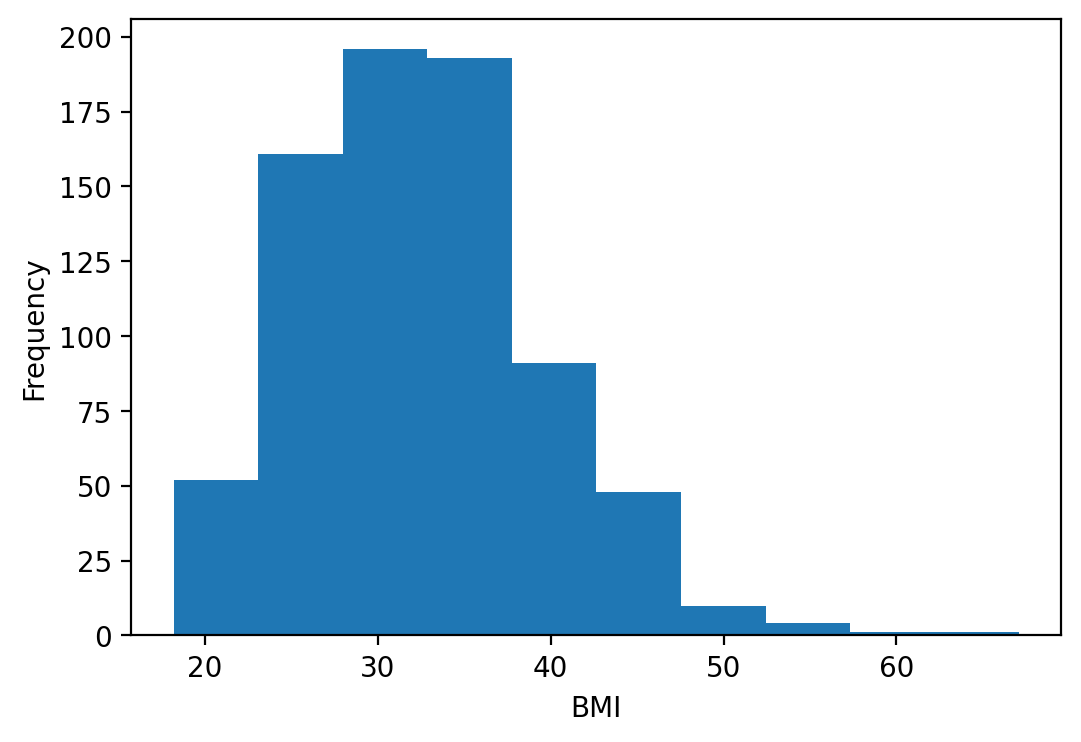

In [17]:
plt.hist(x='BMI', data=diabetes)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

- **Seaborn**의 **histplot()** 함수로 Histogram을 그립니다.

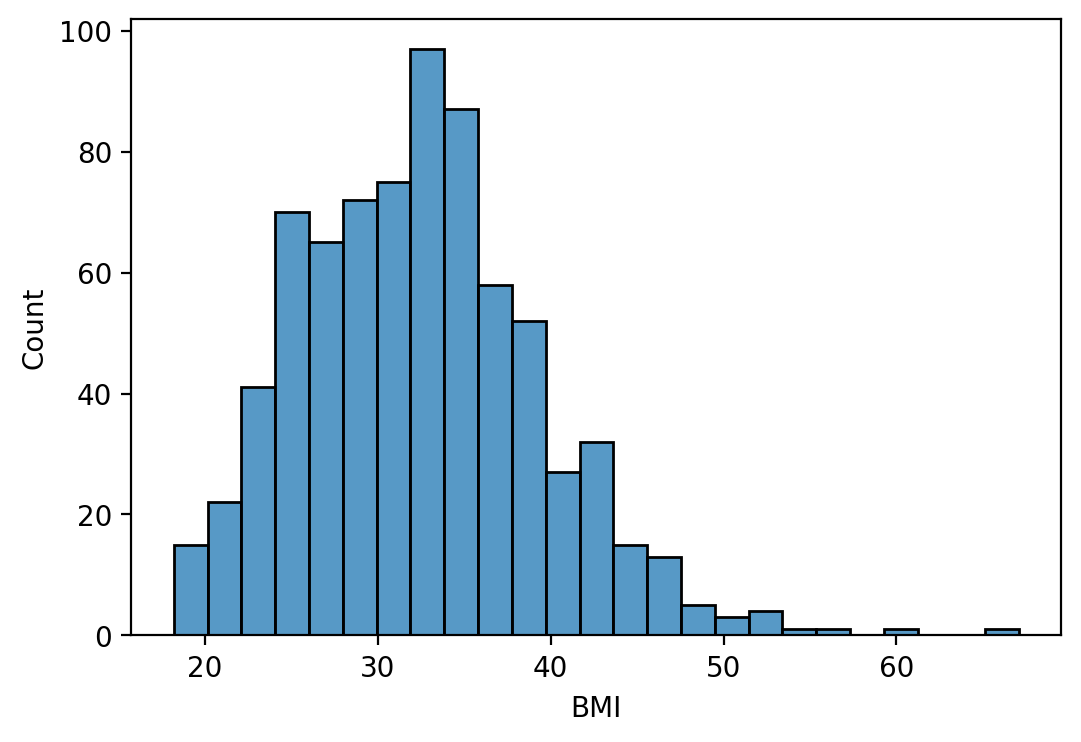

In [18]:
sns.histplot(x='BMI', data=diabetes)
plt.show()

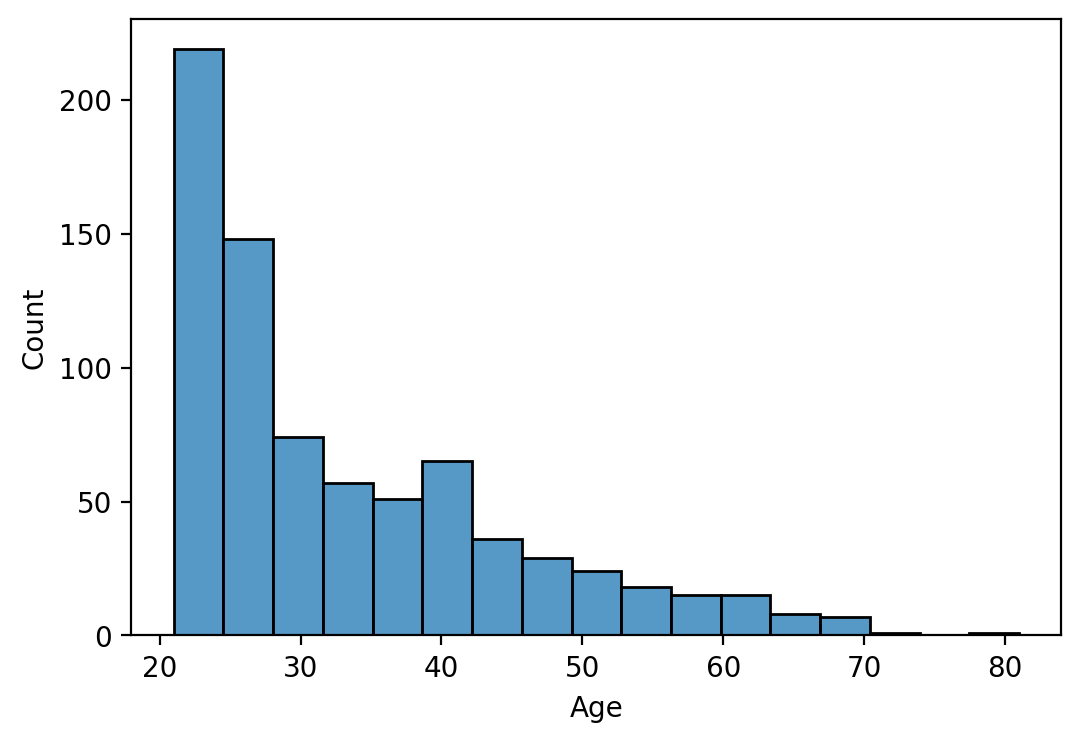

In [20]:
sns.histplot(x='Age', data=diabetes)
plt.show()

- **bins** 옵션을 사용해 구간 개수를 적절히 지정합니다.

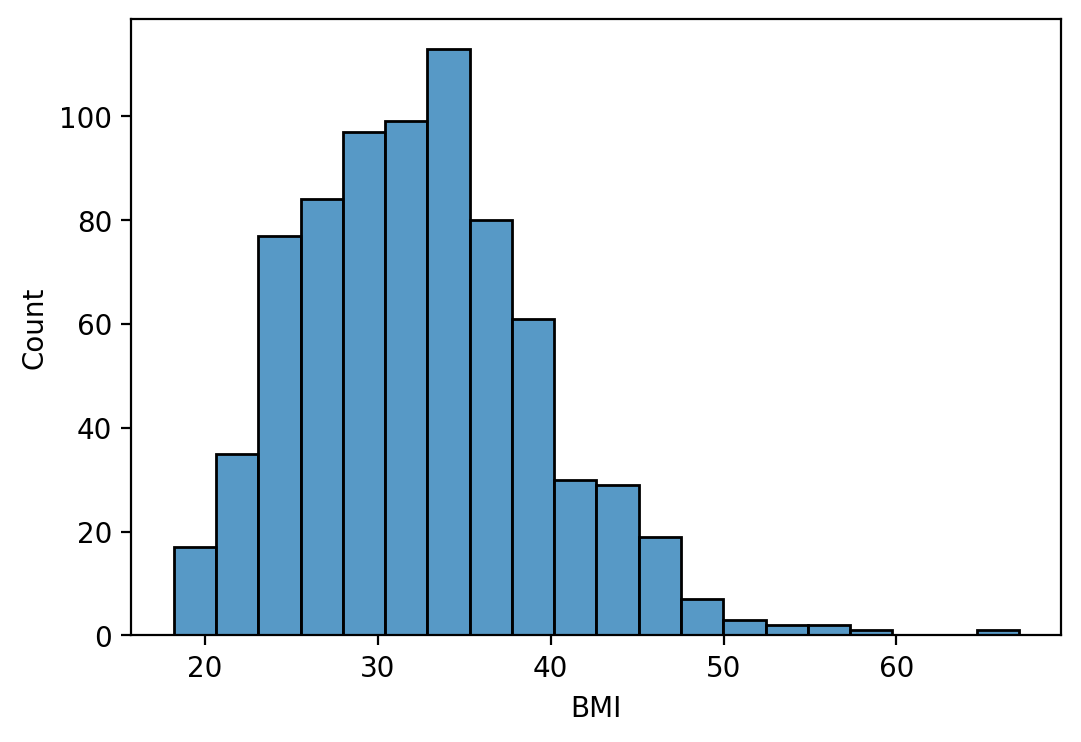

In [19]:
sns.histplot(x='BMI', data=diabetes, bins=20)
plt.show()

### **3.2. Density Plot**

- HIstogram은 bins 옵션에 지정한 구간 개수에 따라 전혀 다른 모양이 될 수 있습니다.
- Density Plot을 사용해 이러한 문제를 해결할 수 있습니다.
- Density Plot은 모든 점에서 데이터 밀도를 추정하는 커널밀도추정 방식을 사용합니다.
- Density Plot 곡선 아래 면적은 1이 됩니다.
- **Pandas**가 제공하는 **plot()** 메소드에 **kind='kde'** 를 지정해 Density Plot을 쉽게 그릴 수 있습니다.

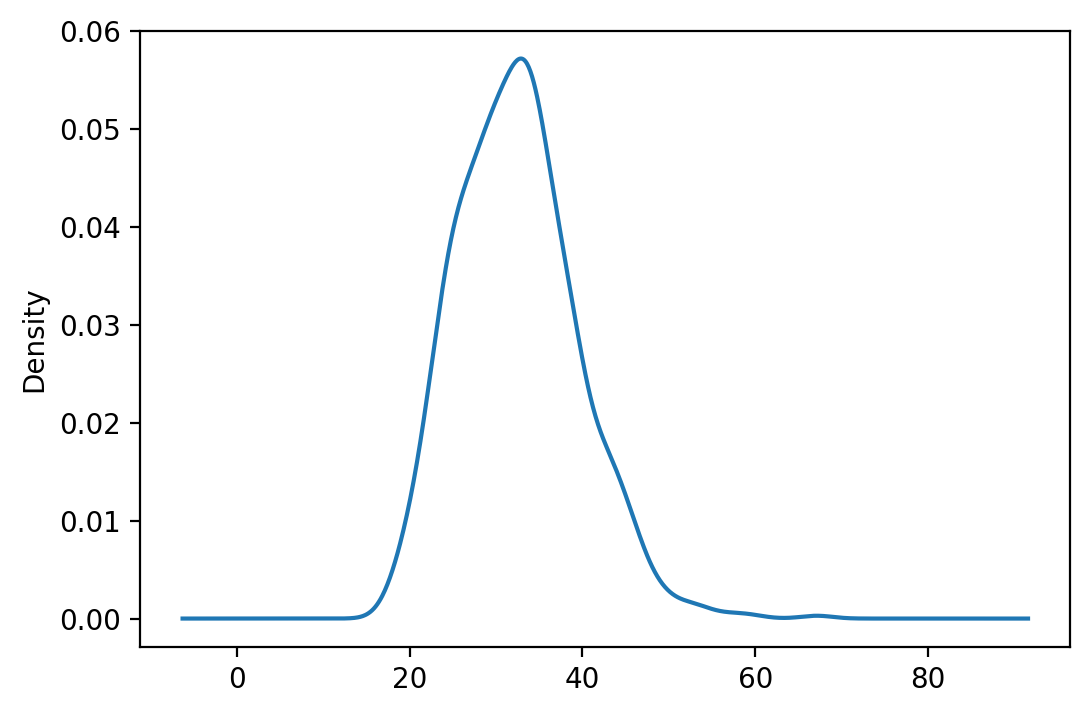

In [21]:
diabetes['BMI'].plot(kind='kde')
plt.show()

- **Seaborn**의 **kdeplot()** 함수를 사용해 Density Plot을 그립니다.

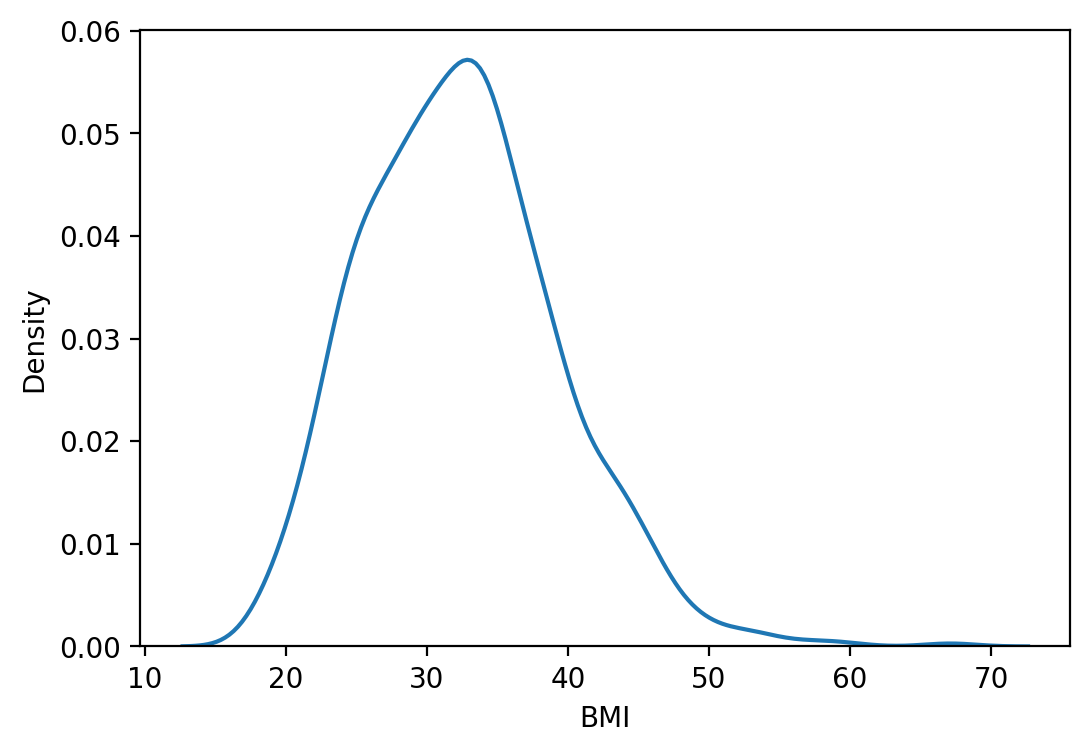

In [22]:
sns.kdeplot(x='BMI', data=diabetes)
plt.show()

**📌 확률 밀도 함수**

- 셀 수 있는 값의 분포, 즉 **이산 확률 분포**는 표로 표현 할 수 있습니다.
- 예를 들면 주사위를 던져 1 ~ 6이 나올 수 있는 확률을 표로 표현할 수 있습니다.
- 반면에 셀 수 없는 값의 분포, 즉 **연속 확률 분포**는 대상 값이 너무 많아 표로 표현할 수 없습니다.
- 그래서 연속 확률 분포는 **함수**, 즉 **그래프**로 표현합니다.
- 예를 들어 키가 140~180 사이인 학생들의 키 분포는 다음과 같이 표현할 수 있습니다.

<img src='https://raw.githubusercontent.com/jangrae/img/master/density.png' width=500 align="left"/>

- 만일 키가 a~b 사이일 확률을 구하고자 한다면 위 그래프에 색이 채워진 영역의 면적입니다.
- 그 면적이 0.4라고 한다면, 이는 40%의 확률을 의미합니다.
- 그래프 전체 면적은 1, 즉 100%가 됩니다.
- 이때 사용된 함수를 **확률 밀도 함수(probability density function)** 라고 부릅니다.

### **3.3. Box Plot**

- Box Plot은 이해하기가 다소 어렵지만, 데이터 분포를 확인하는 유익한 시각화 도구입니다.
- **Matplotlib**의 **boxplot()** 함수를 사용해 Box Plot을 그립니다.

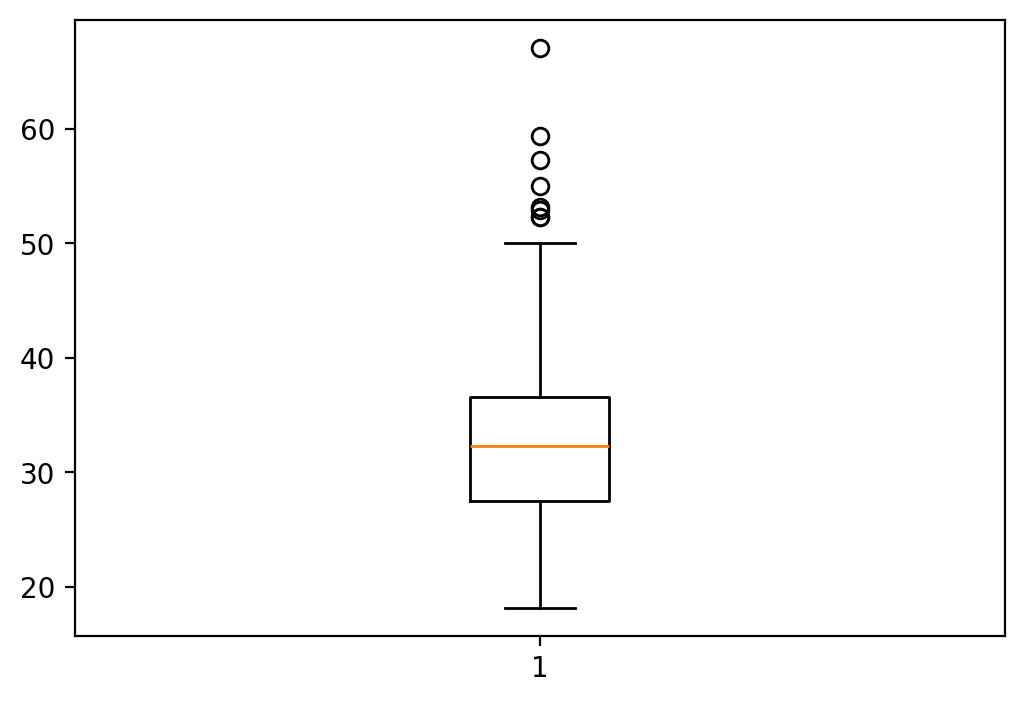

In [23]:
plt.boxplot(x='BMI', data=diabetes[diabetes['BMI'].notna()])
plt.show()

- **주의**: 결측치가 있으면 그래프가 그려지지 않습니다.

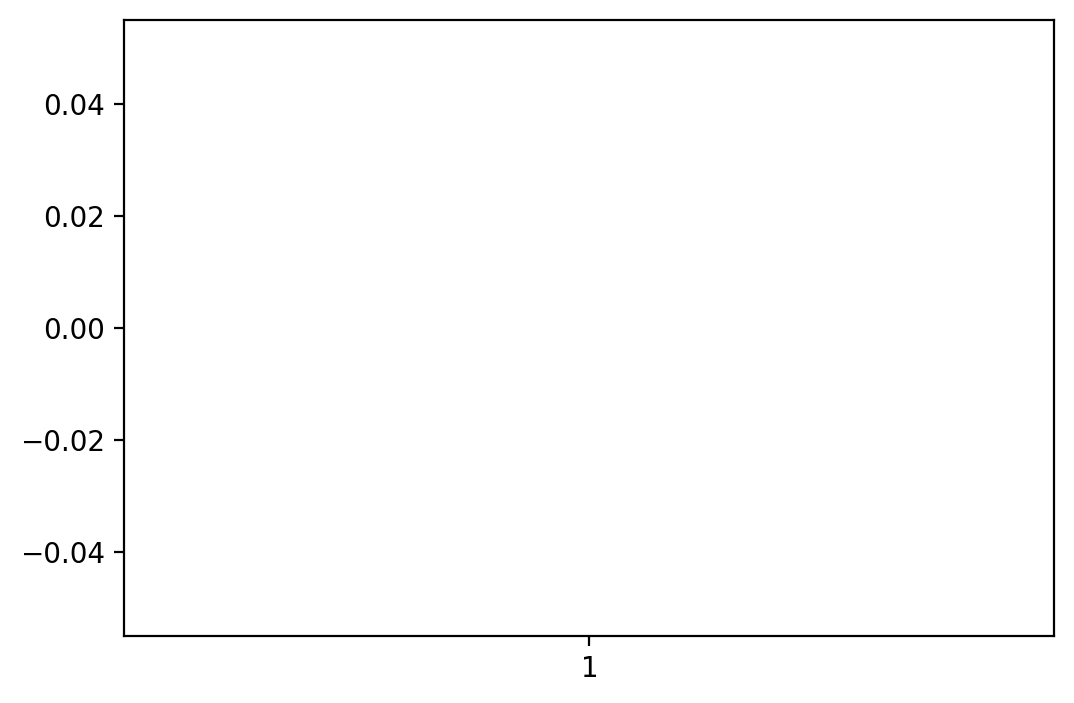

In [24]:
plt.boxplot(x='BMI', data=diabetes)
plt.show()

- **Seaborn**의 **boxplot()** 함수를 사용해 Box Plot을 그립니다.

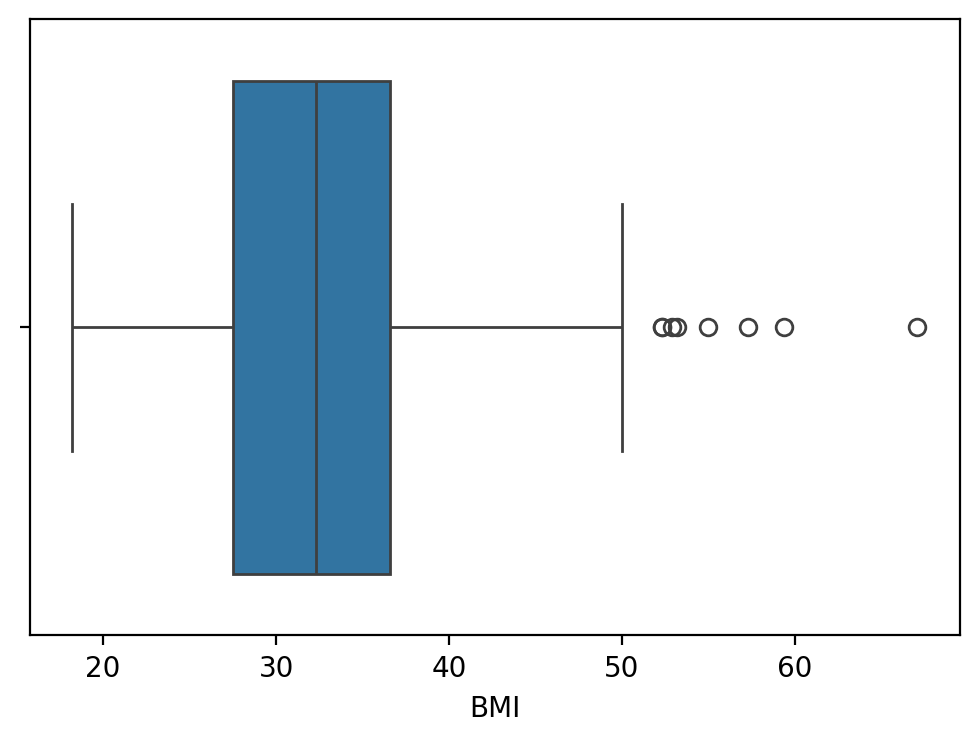

In [25]:
sns.boxplot(x='BMI', data=diabetes[diabetes['BMI'].notna()])
plt.show()

- 결측치가 있어도 그려집니다.

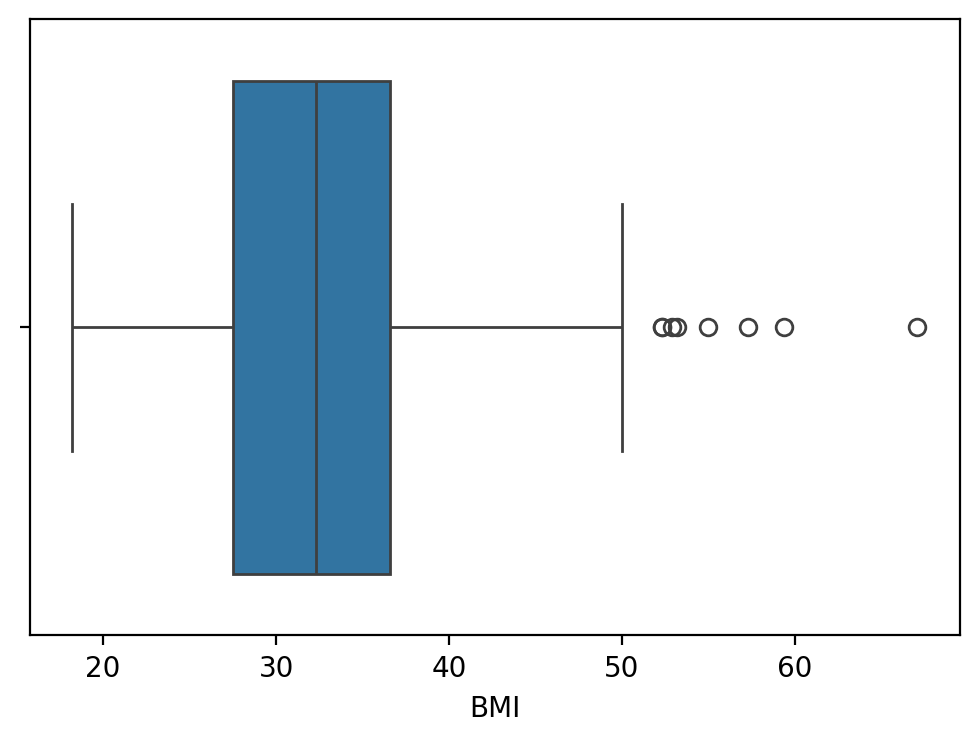

In [26]:
sns.boxplot(x='BMI', data=diabetes)
plt.show()

- 다음과 같이 세로 방향으로 표시할 수 있습니다.

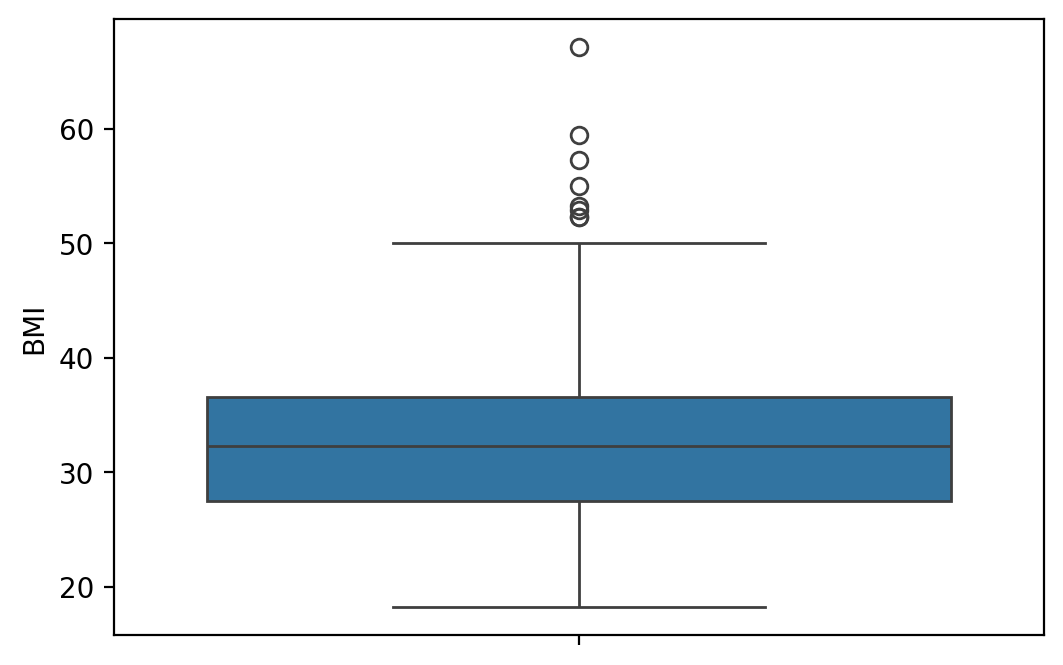

In [27]:
sns.boxplot(y='BMI', data=diabetes)
plt.show()

**📌 박스플롯의 의미**

<img src='https://raw.githubusercontent.com/jangrae/img/master/boxplot03.png' width=800 align="left"/>

- Histogram과 Bax Plot을 같이 그리면 데이터를 더 쉽게 파악할 수 있습니다.

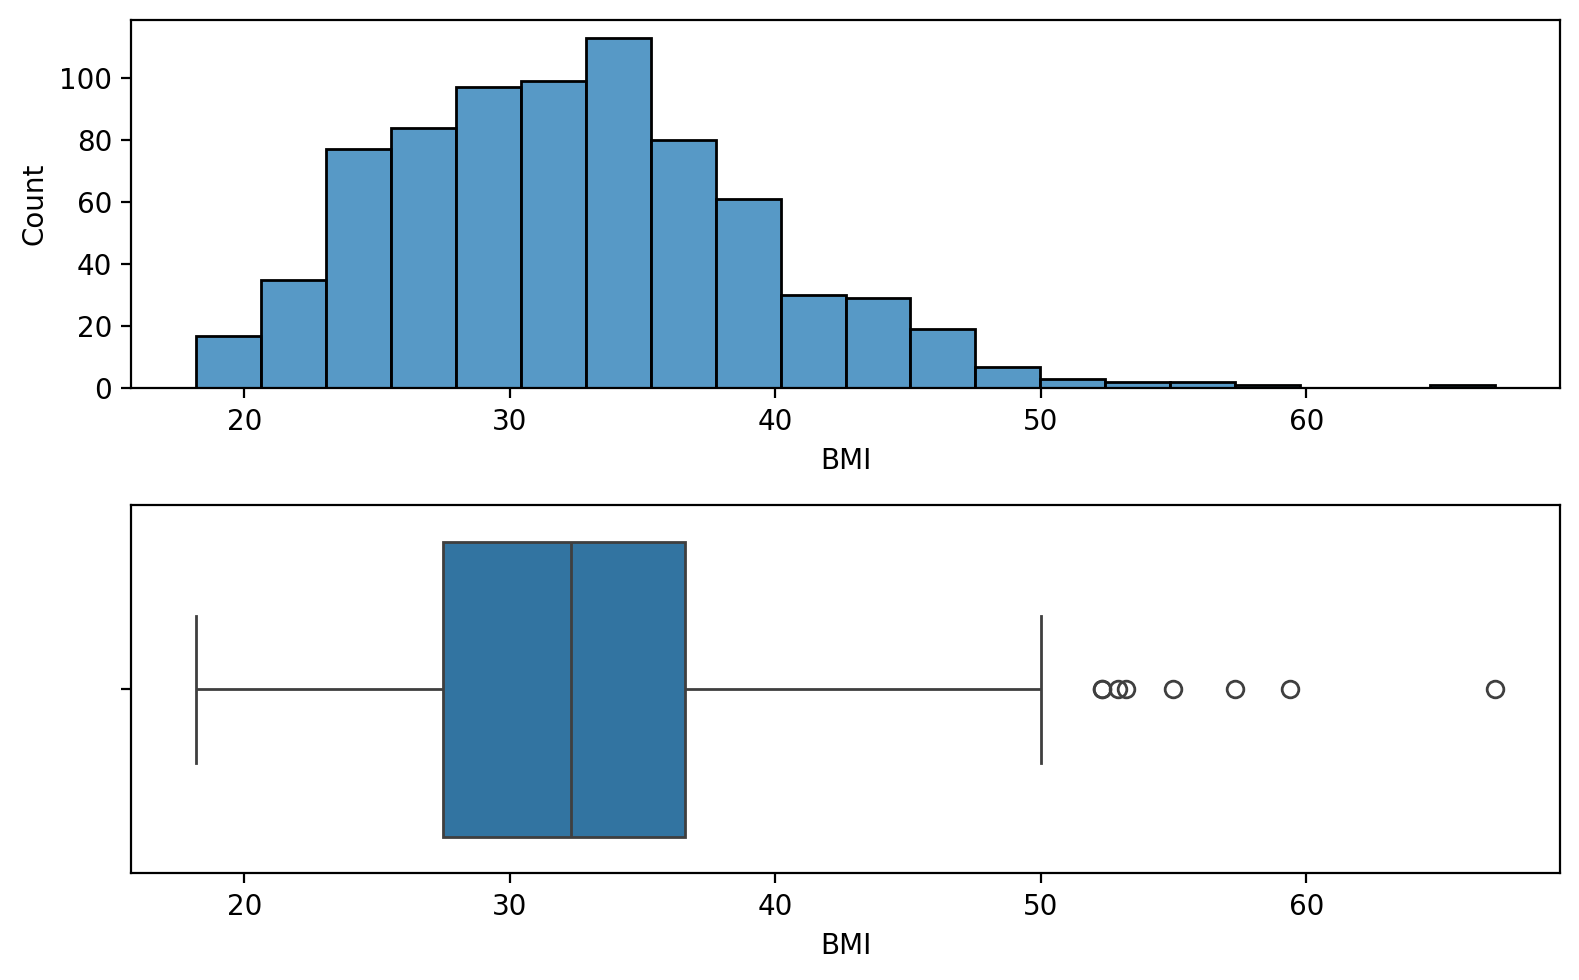

In [28]:
plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
sns.histplot(x='BMI', bins=20, data=diabetes)

plt.subplot(2, 1, 2)
sns.boxplot(x='BMI', data=diabetes)

plt.tight_layout()
plt.show()

### **3.4. 참고: 시계열 데이터 시각화**

- 시계열 데이터는 보통 시간 축(x축)에 맞게 값들을 선 그래프로 표현합니다.
- **Matplotlib**의 **plot()** 함수를 사용해 Line Plot을 그립니다.

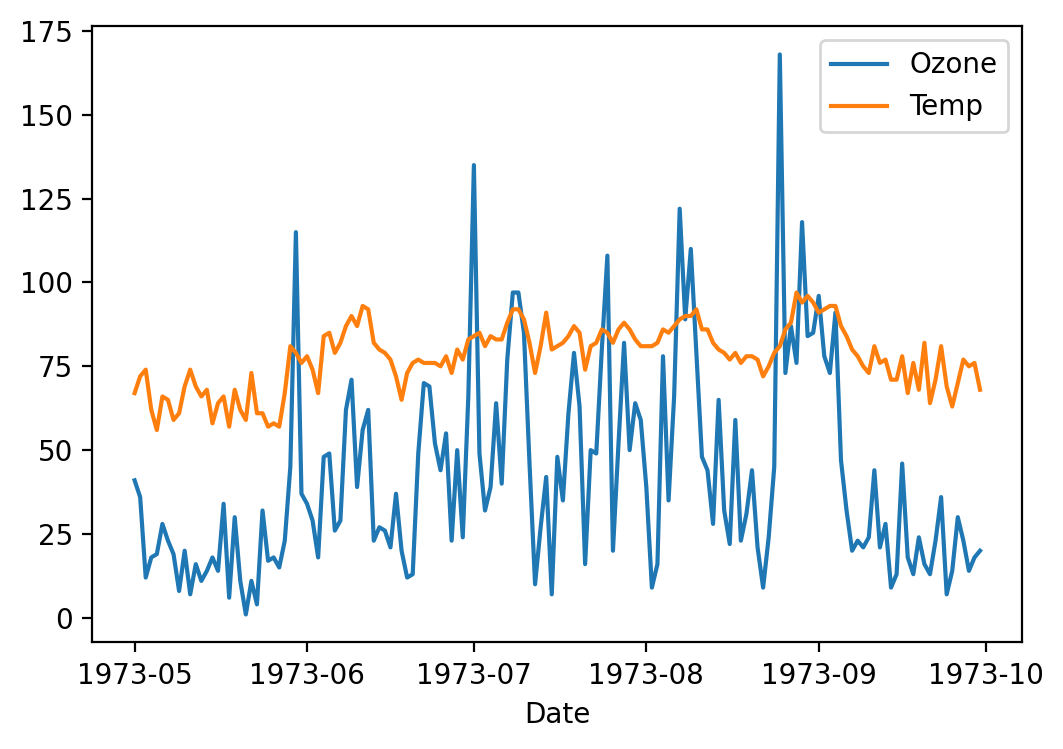

In [29]:
air['Date'] = pd.to_datetime(air['Date'])

plt.plot('Date', 'Ozone', data=air, label='Ozone')
plt.plot('Date', 'Temp', data=air, label='Temp')
plt.xlabel('Date')
plt.legend()
plt.show()

- **Seaborn**의 **lineplot()** 함수를 사용해 Line Plot을 그립니다.

In [ ]:
sns.lineplot(x='Date', y='Ozone', data=air, label='Ozone')
sns.lineplot(x='Date', y='Temp', data=air, label='Temp')
plt.legend()
plt.show()